In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Habitable Worlds Catalog (HWC)

La base de datos que utilizamos en este Jupyter Notebook es el Habitable Worlds Catalogue, o Catálogo de Mundos Habitables en español. Este catálogo contiene toda la información que se puede extraer al descubrir los planetas, como su distancia desde la Tierra, la temperatura, el tipo de estrella que orbita el planeta, el nombre de la estrella, su posición en las constelaciones, masa, etc. Este catálogo recopila más de 5500 planetas y 118 características de cada uno, obtenidos de todos los observatorios del mundo, y desde el descubrimiento de planetas extrasolares en la década de los 90's hasta hoy.

# Carga y descripción de datos

Empezamos cargando la base de datos a nuestro código,

In [ ]:
hwc=pd.read_csv('/content/drive/MyDrive/AST332/hwc.csv')
#hwc=pd.read_csv('hwc.csv')

In [ ]:
filt_hwc=hwc # Variable auxiliar para no editar la base de datos original durante el análisis/limpieza

Vizualizamos nuestra base de datos con la función .head(), que nos entrega las primera 5 filas de la tabla generada.

In [ ]:
filt_hwc.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


In [ ]:
print("Información básica sobre las columnas de interés:")
columnas_interes=['S_LOG_LUM','P_TEMP_SURF','P_ESI','S_MASS','P_HABITABLE']
info_interes = []
for nombre in columnas_interes:
  tipo = filt_hwc[nombre].dtype.name
  valores_nulos = filt_hwc[nombre].isnull().sum()
  info_interes.append(["Nombre:",nombre,"Tipo de dato:",tipo,"Valores nulos:",valores_nulos])
info_interes_np = np.array(info_interes)
print(info_interes_np)
print("")
print("Información básica sobre las columnas:")

info = []
#columnas_interes=['P_MASS','P_RADIUS','P_PERIOD','P_SEMI_MAJOR_AXIS','P_ECCENTRICITY','P_INCLINATION','P_OMEGA','S_MAG','S_DISTANCE','S_TEMPERATURE','S_MASS','S_RADIUS','S_METALLICITY','S_AGE','S_LOG_LUM','S_LOG_G','P_ESCAPE','P_POTENTIAL','P_GRAVITY','P_DENSITY','P_HILL_SPHERE','P_DISTANCE','P_PERIASTRON','P_APASTRON','P_FLUX','P_TEMP_EQUIL','P_TEMP_SURF','S_LUMINOSITY','S_SNOW_LINE','S_ABIO_ZONE','S_TIDAL_LOCK','P_ESI','P_HABITABLE']
for nombre in filt_hwc:
#for nombre in columnas_interes:
  tipo = filt_hwc[nombre].dtype.name
  valores_nulos = filt_hwc[nombre].isnull().sum()
  info.append(["Nombre:",nombre,"Tipo de dato:",tipo,"Valores nulos:",valores_nulos])
info_np = np.array(info)
print(info_np)



Información básica sobre las columnas de interés:
[['Nombre:' 'S_LOG_LUM' 'Tipo de dato:' 'float64' 'Valores nulos:' '235']
 ['Nombre:' 'P_TEMP_SURF' 'Tipo de dato:' 'float64' 'Valores nulos:'
  '3158']
 ['Nombre:' 'P_ESI' 'Tipo de dato:' 'float64' 'Valores nulos:' '241']
 ['Nombre:' 'S_MASS' 'Tipo de dato:' 'float64' 'Valores nulos:' '4']
 ['Nombre:' 'P_HABITABLE' 'Tipo de dato:' 'int64' 'Valores nulos:' '0']]

Información básica sobre las columnas:
[['Nombre:' 'P_NAME' 'Tipo de dato:' 'object' 'Valores nulos:' '0']
 ['Nombre:' 'P_DETECTION' 'Tipo de dato:' 'object' 'Valores nulos:' '0']
 ['Nombre:' 'P_DISCOVERY_FACILITY' 'Tipo de dato:' 'object'
  'Valores nulos:' '0']
 ['Nombre:' 'P_YEAR' 'Tipo de dato:' 'int64' 'Valores nulos:' '0']
 ['Nombre:' 'P_UPDATE' 'Tipo de dato:' 'object' 'Valores nulos:' '0']
 ['Nombre:' 'P_MASS' 'Tipo de dato:' 'float64' 'Valores nulos:' '7']
 ['Nombre:' 'P_MASS_ERROR_MIN' 'Tipo de dato:' 'float64' 'Valores nulos:'
  '3093']
 ['Nombre:' 'P_MASS_ERROR_MAX'

# Limpieza de datos

Para entender mejor la robustez de nuestros análisis y conclusiones, debemos conocer la distribución y cantidad de datos con los que vamos a trabajar, para eso utilizamos las funciones .shape e isnull.(), las cuales nos entregan la cantidad de columnas/filas y la cantidad de variables nulas en una columna, correspondientemente. En este caso nos interesan específicamente las variables relacionadas a la habitabilidad de un planeta, las cuales encontramos al revisar distintos papers que estudian el tema.

In [ ]:
# Cantidad de columna
print('Cantidad de columnas:',filt_hwc.shape[1])

# Cantidad de filas
print('Cantidad de filas:',filt_hwc.shape[0])

# Contamos cuantas filas nulas hay en cada columna

print('Filas de interes nulas:')
print('S_LOG_LUM:',filt_hwc['S_LOG_LUM'].isnull().sum())
print('P_TEMP_SURF:',filt_hwc['P_TEMP_SURF'].isnull().sum())
print('P_ESI:',filt_hwc['P_ESI'].isnull().sum())
print('S_MASS:',filt_hwc['S_MASS'].isnull().sum())
print('P_HABITABLE:',filt_hwc['P_HABITABLE'].isnull().sum())

Cantidad de columnas: 118
Cantidad de filas: 5599
Filas de interes nulas:
S_LOG_LUM: 235
P_TEMP_SURF: 3158
P_ESI: 241
S_MASS: 4
P_HABITABLE: 0


Vemos que hay una gran cantidad de datos faltantes en la columna de temperatura superficial del planeta, esto es más de la mitad de los datos totales, así que podría llevar a un cesgo considerable cuando analicemos esta variable respecto a otras.

Si bien el proyecto de Habitable Worlds Catalog es un trabajo transversal muy completo, no esta demás asegurarnos de que no existan planetas duplicados en nuestro set de datos.

In [ ]:
# Detectando planetas duplicados
filt_hwc['P_NAME'].duplicated().sum()

0

Por último, calculamos la cantidad de outliers en las columnas de interes.

In [ ]:
# Calcular el IQR
Q1 = filt_hwc['S_MASS'].quantile(0.25)
Q3 = filt_hwc['S_MASS'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar los outliers
outliers = filt_hwc[(filt_hwc['S_MASS'] < lower_bound) | (filt_hwc['S_MASS'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Número de outliers en la columna 'S_MASS': {num_outliers}")

Q1 = filt_hwc['P_ESI'].quantile(0.25)
Q3 = filt_hwc['P_ESI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = filt_hwc[(filt_hwc['P_ESI'] < lower_bound) | (filt_hwc['P_ESI'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Número de outliers en la columna 'P_ESI': {num_outliers}")

Q1 = filt_hwc['S_LOG_LUM'].quantile(0.25)
Q3 = filt_hwc['S_LOG_LUM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = filt_hwc[(filt_hwc['S_LOG_LUM'] < lower_bound) | (filt_hwc['S_LOG_LUM'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Número de outliers en la columna 'S_LOG_LUM': {num_outliers}")

Q1 = filt_hwc['P_TEMP_SURF'].quantile(0.25)
Q3 = filt_hwc['P_TEMP_SURF'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = filt_hwc[(filt_hwc['P_TEMP_SURF'] < lower_bound) | (filt_hwc['P_TEMP_SURF'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Número de outliers en la columna 'P_TEMP_SURF': {num_outliers}")

Número de outliers en la columna 'S_MASS': 434
Número de outliers en la columna 'P_ESI': 291
Número de outliers en la columna 'S_LOG_LUM': 366
Número de outliers en la columna 'P_TEMP_SURF': 71


En comparación a la cantidad total de planetas con los que trabajamos, consideramos que la cantidad de outliers en los parámetros anteriores no deberían entorpecer gravemente las distribuciones y análisis realizados en estre notebook.

# Análisis estadístico

In [ ]:
filt_hwc['S_TYPE_TEMP'].value_counts()

,count
S_TYPE_TEMP,
G,2367
K,1475
F,945
M,551
A,34
B,20
PSR,7
WD,3
BD,2


In [ ]:
filt_hwc['P_HABITABLE'].value_counts()

,count
P_HABITABLE,
0,5529
2,41
1,29


In [ ]:
filt_hwc['P_HABZONE_OPT'].value_counts()

,count
P_HABZONE_OPT,
0,5335
1,264


In [ ]:
filt_hwc['P_HABZONE_CON'].value_counts()

,count
P_HABZONE_CON,
0,5411
1,188


In [ ]:
print("Rango de variables")
print('S_LOG_LUM:',filt_hwc['S_LOG_LUM'].min(),"-",filt_hwc['S_LOG_LUM'].max())
print('P_TEMP_SURF:',filt_hwc['P_TEMP_SURF'].min(),"-",filt_hwc['P_TEMP_SURF'].max())
print('P_ESI:',filt_hwc['P_ESI'].min(),"-",filt_hwc['P_ESI'].max())
print('S_MASS:',filt_hwc['S_MASS'].min(),"-",filt_hwc['S_MASS'].max())
print("")

print("Medidas de dispersión")

print("Promedio:")
print('S_LOG_LUM:',filt_hwc['S_LOG_LUM'].mean())
print('P_TEMP_SURF:',filt_hwc['P_TEMP_SURF'].mean())
print('P_ESI:',filt_hwc['P_ESI'].mean())
print('S_MASS:',filt_hwc['S_MASS'].mean())

print("Mediana:")
print('S_LOG_LUM:',filt_hwc['S_LOG_LUM'].median())
print('P_TEMP_SURF:',filt_hwc['P_TEMP_SURF'].median())
print('P_ESI:',filt_hwc['P_ESI'].median())
print('S_MASS:',filt_hwc['S_MASS'].median())

print("Desviación estándar:")
print('S_LOG_LUM:',filt_hwc['S_LOG_LUM'].std())
print('P_TEMP_SURF:',filt_hwc['P_TEMP_SURF'].std())
print('P_ESI:',filt_hwc['P_ESI'].std())
print('S_MASS:',filt_hwc['S_MASS'].std())

print("Desviación estándar dividida en rango:")
print('S_LOG_LUM:',filt_hwc['S_LOG_LUM'].std()/(filt_hwc['S_LOG_LUM'].max()-filt_hwc['S_LOG_LUM'].min()))
print('P_TEMP_SURF:',filt_hwc['P_TEMP_SURF'].std()/(filt_hwc['P_TEMP_SURF'].max()-filt_hwc['P_TEMP_SURF'].min()))
print('P_ESI:',filt_hwc['P_ESI'].std()/(filt_hwc['P_ESI'].max()-filt_hwc['P_ESI'].min()))
print('S_MASS:',filt_hwc['S_MASS'].std()/(filt_hwc['S_MASS'].max()-filt_hwc['S_MASS'].min()))

print("")
print("Medidas de dispersión, separadas por planetas habitables")
print("")
print("Promedio:")
print('S_LOG_LUM:',filt_hwc.groupby(['P_HABITABLE'])['S_LOG_LUM'].mean())
print('P_TEMP_SURF:',filt_hwc.groupby(['P_HABITABLE'])['P_TEMP_SURF'].mean())
print('P_ESI:',filt_hwc.groupby(['P_HABITABLE'])['P_ESI'].mean())
print('S_MASS:',filt_hwc.groupby(['P_HABITABLE'])['S_MASS'].mean())
print("")
print("Mediana:")
print('S_LOG_LUM:',filt_hwc.groupby(['P_HABITABLE'])['S_LOG_LUM'].median())
print('P_TEMP_SURF:',filt_hwc.groupby(['P_HABITABLE'])['P_TEMP_SURF'].median())
print('P_ESI:',filt_hwc.groupby(['P_HABITABLE'])['P_ESI'].median())
print('S_MASS:',filt_hwc.groupby(['P_HABITABLE'])['S_MASS'].median())
print("")
print("Desviación estándar:")
print('S_LOG_LUM:',filt_hwc.groupby(['P_HABITABLE'])['S_LOG_LUM'].std())
print('P_TEMP_SURF:',filt_hwc.groupby(['P_HABITABLE'])['P_TEMP_SURF'].std())
print('P_ESI:',filt_hwc.groupby(['P_HABITABLE'])['P_ESI'].std())
print('S_MASS:',filt_hwc.groupby(['P_HABITABLE'])['S_MASS'].std())

Rango de variables
S_LOG_LUM: -6.09 - 3.8
P_TEMP_SURF: 130.66165 - 8125.4963
P_ESI: 0.023895537 - 0.96836238
S_MASS: 0.01 - 10.94

Medidas de dispersión
Promedio:
S_LOG_LUM: -0.11531226696495152
P_TEMP_SURF: 971.9940228635805
P_ESI: 0.25708915393710335
S_MASS: 0.9502377122430742
Mediana:
S_LOG_LUM: -0.066
P_TEMP_SURF: 908.70112
P_ESI: 0.268054915
S_MASS: 0.95
Desviación estándar:
S_LOG_LUM: 0.7590245486901154
P_TEMP_SURF: 487.3828710507007
P_ESI: 0.1316215711908281
S_MASS: 0.42323409311687066
Desviación estándar dividida en rango:
S_LOG_LUM: 0.0767466682194252
P_TEMP_SURF: 0.060962220281904234
P_ESI: 0.1393607114599661
S_MASS: 0.03872224090730747

Medidas de dispersión, separadas por planetas habitables

Promedio:
S_LOG_LUM: P_HABITABLE
0   -0.094525
1   -2.258586
2   -1.283439
Name: S_LOG_LUM, dtype: float64
P_TEMP_SURF: P_HABITABLE
0    992.734154
1    263.501617
2    273.736204
Name: P_TEMP_SURF, dtype: float64
P_ESI: P_HABITABLE
0    0.250713
1    0.798722
2    0.696289
Name: P_ESI

#Análisis de variables de interés
##Análisis de S_LOG_LUM
Considerando la escala, el promedio y la mediana son bastante cercanos, por lo que la distribución parece distribuirse de manera bastante simétrica. La desviación estándar es pequeña en comparación al rango, por lo que los valores parecen distribuirse cerca de la media
##Análisis de P_TEMP_SURF
Considerando la escala, el promedio y la mediana son casi idénticos, por lo que la distribución parece distribuirse de manera muy simétrica. La desviación estándar es pequeña en comparación al rango, por lo que los valores parecen distribuirse cerca de la media
##Análisis de P_ESI
Considerando la escala, el promedio y la mediana son casi idénticos, por lo que la distribución parece distribuirse de manera muy simétrica. A diferencia de los casos anteriores, la desviación estándar es mayor al 10% del rango, por lo que los valores no se concentrarán tanto alrededor de la media
##Análisis de S_MASS
Considerando la escala, el promedio y la mediana son casi idénticos, por lo que la distribución parece distribuirse de manera muy simétrica. Entre las variables de interés, ésta es la variable con desviación estándar más pequeña en comparación al rango, por lo que los valores se centrarán bastante alrededor de la media
#Comparación al separar las variables por mundos habitables (P_HABITABLE)
##Promedio
El promedio de las 4 variables parece ser sensible a filtrar por mundos habitables. En el caso de S_LOG_LUM y S_MASS, es distinto para los 3 posibles valores de P_HABITABLE, mientras que para S_LOG_LUM y P_ESI lo más importante es que P_HABITABLE sea distinto de 0
##Mediana
Puede apreciarse la misma tendencia de sensibilidad que la del promedio en las distintas variables
##Cercanía de promedio y mediana
###S_LOG_LUM
Para P_HABITABLE = 0 no parece haber cambios en la separación, pero para P_HABITABLE distinto de 0 parecen estar más cerca, mejorando la simetría de la distribución
###P_TEMP_SURF, P_ESI y S_MASS
Las distribuciones siguen teniendo diferencias pequeñas entre media y mediana, conservando su simetría heredada antes de separarse
##Desviación estándar
###S_LOG_LUM
No presenta muchos cambios
###TEMP_SURF
La desviación estándar casi no presenta cambios para planetas no habitables (P_HABITABLE=0). Sin embargo, disminuye notoriamente para planetas habitables
###P_ESI
La desviación estándar disminuye ligeramente, salvo para P_HABITABLE=2, donde la disminución es mayor a 1/3
###S_MASS
La desviación estándar casi no presenta cambios para planetas no habitables (P_HABITABLE=0). Sin embargo, disminuye a aproximadamente la mitad para planetas habitables

# Visualización de datos

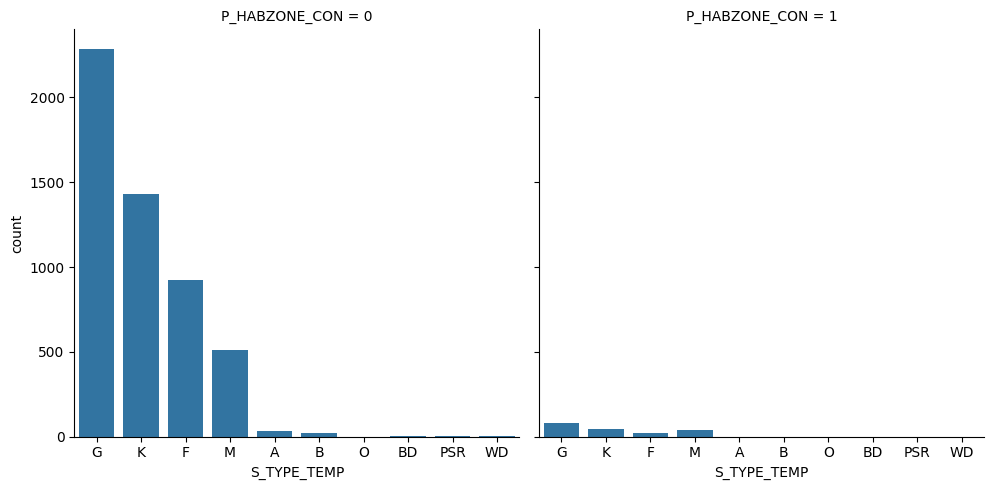

In [ ]:
sns.catplot(x = 'S_TYPE_TEMP', kind = "count", col  = "P_HABZONE_CON", data = filt_hwc)
plt.show()

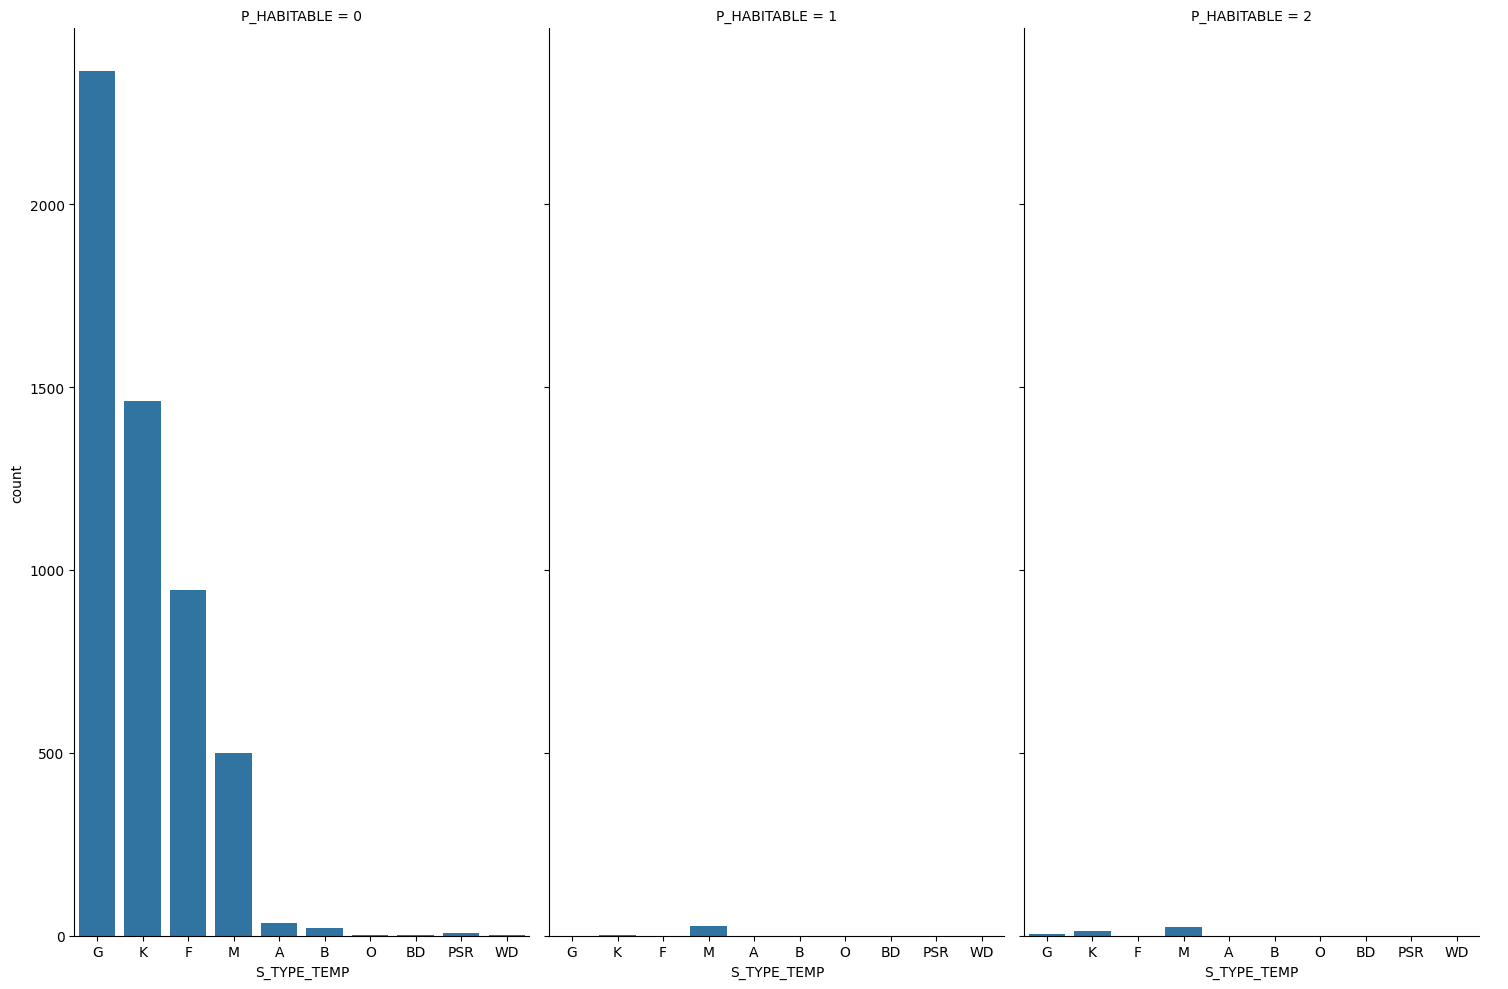

In [ ]:
sns.catplot(x = 'S_TYPE_TEMP', kind = "count", col  = "P_HABITABLE", data = filt_hwc, aspect=0.5, height=10)
plt.show()

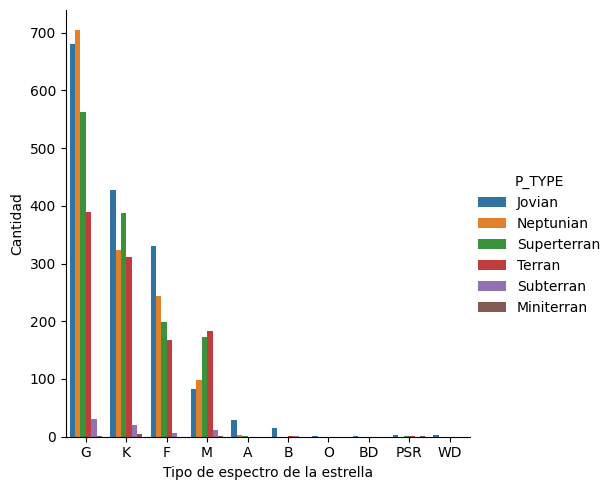

In [ ]:
a=sns.catplot(
    data=hwc, x="S_TYPE_TEMP",
    hue="P_TYPE",
    kind="count"
)
a.set(xlabel='Tipo de espectro de la estrella',ylabel='Cantidad')

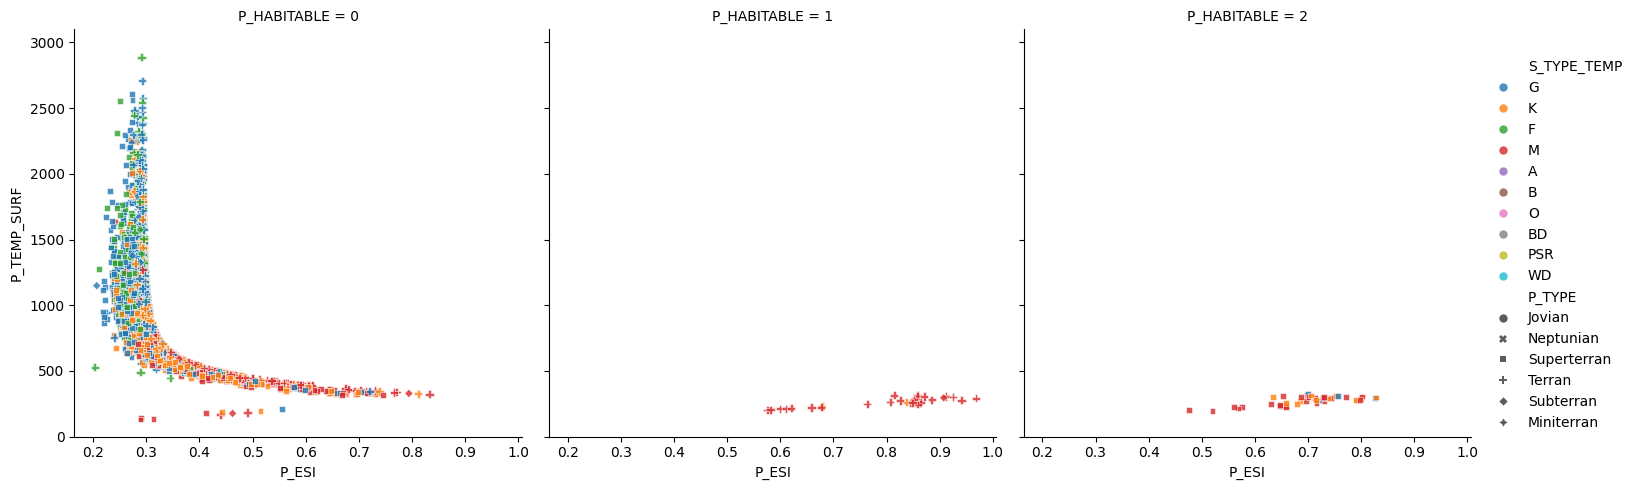

In [ ]:
a=sns.relplot(
    data=hwc, x="P_ESI", y="P_TEMP_SURF",
    col="P_HABITABLE", hue="S_TYPE_TEMP",
    kind="scatter",style='P_TYPE',alpha=0.8
)
a.set(ylim=(0,3100))   # P_ESI es el Earth Similarity Index, que indica cuán similar es el planeta a la Tierra.
                      #P_HABITABLE significa si un planeta es habitable o no, con '1' siendo no optimista y 2 siendo optimista

[Text(0.5, 0, 'Año descubierto'), Text(0, 0.5, 'Cantidad')]

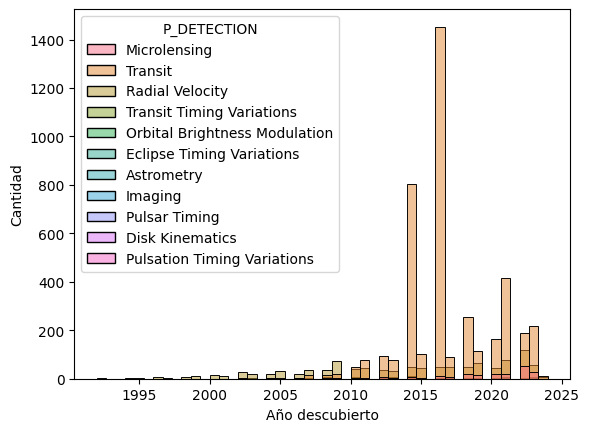

In [ ]:
a=sns.histplot(
    data=hwc, x="P_YEAR",
    hue="P_DETECTION",
)
a.set(xlabel='Año descubierto',ylabel='Cantidad')

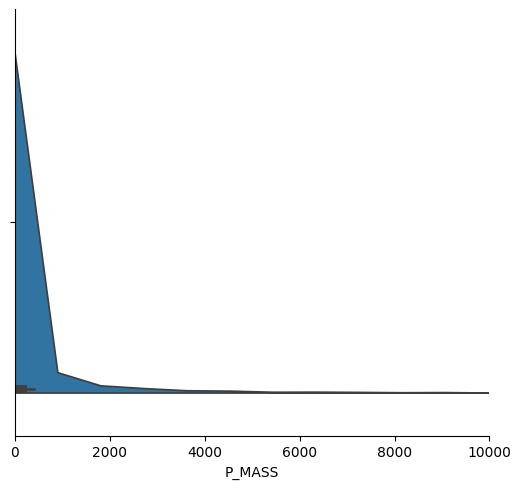

In [ ]:
a=sns.catplot(
    data=hwc, x=filt_hwc['P_MASS'],
    kind="violin", bw_adjust=.5, cut=0, split=True
)
a.set(xlim=(0,10000))

Para dar inicio al análisis de correlación primero realizamos un heatmap para así determinar visualmente las variables que presentan mayor correlación (tanto positiva como negativa), para esto, consideramos solo las filas que tienen valores númericos.

In [ ]:
#filt = filt_hwc.drop(['P_NAME','P_DETECTION','P_DISCOVERY_FACILITY','P_YEAR','P_UPDATE','P_MASS_ORIGIN','P_MASS_ERROR_MIN','P_MASS_ERROR_MAX','P_MASS_LIMIT','S_NAME','P_RADIUS_ERROR_MIN','P_RADIUS_ERROR_MAX','P_RADIUS_LIMIT','','S_NAME_HD','S_NAME_HIP','S_TYPE','P_TYPE','S_TYPE_TEMP','S_RA_STR','S_DEC_STR','S_RA_TXT','S_DEC_TXT','S_CONSTELLATION','S_CONSTELLATION_ABR','S_CONSTELLATION_ENG','P_TYPE_TEMP'], axis=1)
filt=filt_hwc[['P_MASS','P_RADIUS','P_PERIOD','P_SEMI_MAJOR_AXIS','P_ECCENTRICITY','P_INCLINATION','P_OMEGA','S_MAG','S_DISTANCE','S_TEMPERATURE','S_MASS','S_RADIUS','S_METALLICITY','S_AGE','S_LOG_LUM','S_LOG_G','P_ESCAPE','P_POTENTIAL','P_GRAVITY','P_DENSITY','P_HILL_SPHERE','P_DISTANCE','P_PERIASTRON','P_APASTRON','P_FLUX','P_TEMP_EQUIL','P_TEMP_SURF','S_LUMINOSITY','S_SNOW_LINE','S_ABIO_ZONE','S_TIDAL_LOCK','P_ESI','P_HABITABLE']]

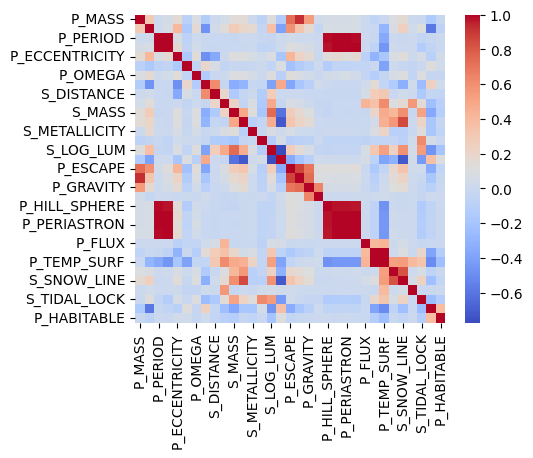

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = filt.corr()

# Crear heatmap
plt.figure(figsize = (5,4))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

# Análisis de correlación

Ahora, calculemos la matriz de correlacion para los parámetros que sabemos tienen gran importancia al determinar si un planeta es habitable o no, estos parámetros serían: la luminosidad de la estrella huésped en escala logaritmica (S_LOG_SUM), la temperatura superficial del planeta (P_TEMP_SUFR), la similitud del planeta con la Tierra (P_ESI) y la masa de la estrella huésped.

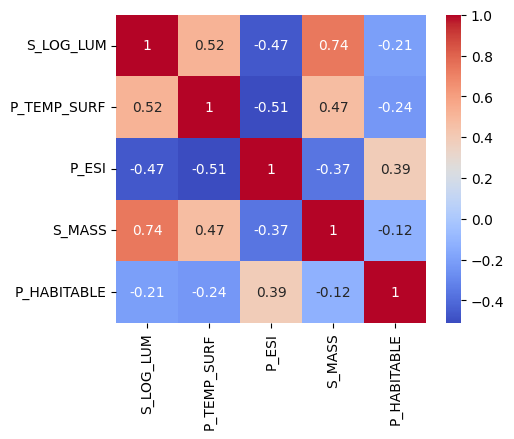

In [ ]:
corr1 = filt_hwc[['S_LOG_LUM','P_TEMP_SURF','P_ESI','S_MASS','P_HABITABLE']]

# Calculamos la matriz de correlación
correlation_matrix = corr1.corr()

# Creación del heatmap
plt.figure(figsize = (5,4))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.show()

Vemos que de estos parámetros, el parámetro 'P_ESI' es el único que se relaciona proporcionalmente directamente con la habitabilidad del planeta. Mientras que el parámetro 'P_TEMP_SURF' tiene una relación inversamente proporcional más marcada con 'P_HABITABLE'.

Las siguientes matrices de correlación estan compuestas de dos conjuntos de parámetros que poseen una gran correlación entre sí.

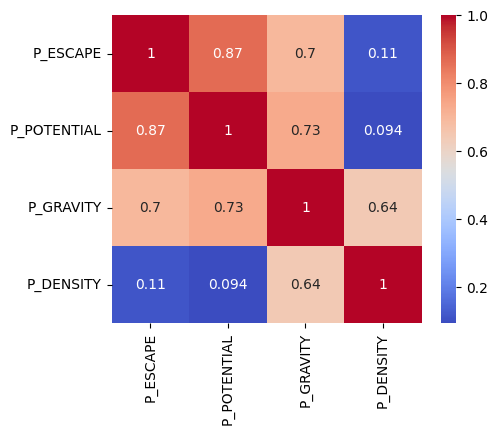

In [ ]:
corr2 = filt_hwc[['P_ESCAPE','P_POTENTIAL','P_GRAVITY','P_DENSITY']] #Nuevo Filtro con datos acotados

correlation_matrix = corr2.corr()

plt.figure(figsize = (5,4))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.show()

Cabe destacar que los parámetros de velocidad de escape del planeta (P_ESCAPE), potencial gravitatorio ('P_POTENTIAL) y gravedad del planeta ('P_GRAVITY') son conceptos físicos que se espera esten relacionados, especialmente los primeros dos, ya que las ecuaciones que entregan esos valores se construyen usando la constante de gravitación universal, la masa del planeta y la distancia en donde se calcula cada parámetro, solo se diferencian en constantes.

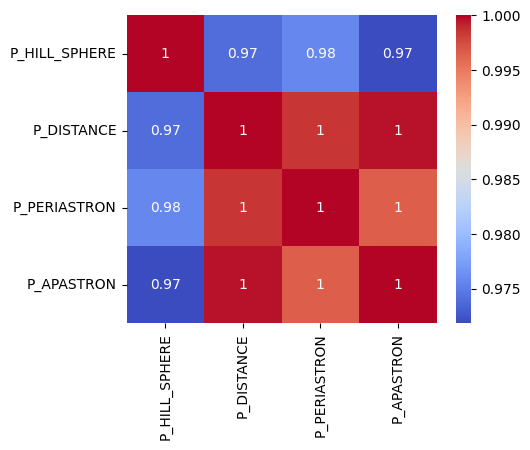

In [ ]:
corr3 = filt_hwc[['P_HILL_SPHERE','P_DISTANCE','P_PERIASTRON','P_APASTRON']]

correlation_matrix = corr3.corr()

plt.figure(figsize = (5,4))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.show()

En este segundo conjunto vemos que se presenta una relación directamente proporcional entre casi todos los parámetros, esto se debe que todos estos conceptos físicos se relacionan a la dinámica del planeta con la estrella, especificamente a la distancia máxima y mínima entre el planeta y su estrella al orbitar, al igual que el semi eje mayor del planeta y su excentricidad.

En futuros modelos de machine learning que nos ayuden a predecir la habitabilidad de un planeta sería útil poder resumir estas variables con alta tasa de correlación positiva, es decir, buscar una manera de saber si alguna de estas variables "contiene" a la otra, para así agilizar el analisis que deba hacer el modelo. También debemos recordar la falta de datos en la variable 'P_TEMP_SURF', por lo que para obtener una matriz de correlación robusta sería bueno buscar otra variable más completa con la que podamos trabajar, o considerar otros catalogos.

# Conclusiones


Por consecuencia, las variables que muestran el error de cada dato son ignoradas, ya que la mayoría tiene una gran cantidad de datos perdidos. En este caso, se ignoran las variables que contengan la palabra 'ERROR'. A parte de eso, se ve que hay variables que no suman conclusiones tan significantes para nuestro analisis, ya que varios datos que no contienen absoluta relacion con los planetas, como la magnitud de la estrella, la gravedad, la constelación o el origen de la masa del planeta, además, habiendo similitud en varios datos, como la densidad, se nota que hay un sesgo en el catalogo, debido a la recolección y a la cantidad. Nuestro analisis se concentra en obtener relaciones directas y indirectas a que un planeta sea habitable, ya que el catalogo es de planetas clasificados como habitables o no. Entre todas las 117 variables en este catalogo, se resaltan los datos como 'P_ESI', abreviatura de 'Planet Earth Similarity Index', es decir, Índice de Similitud a la Tierra en ingles. Este dato contiene relaciones directas con el tipo de planeta, es decir, la variable 'P_TYPE' en el documento, que clasifica cada planeta como: 'Jovian','Neptunian','Superterran','Terran','Subterran','Miniterran'. Entre estos, la mayoría que contiene la palabra terran, los jovianos y neptunianos son habitables, sin embargo, los subterran y miniterran no contienen ningun planeta habitable confirmado, tal vez por sesgo de datos.  A través de todos los planetas, los que son 'hot' y 'cold' son completamente inhabitables. El ESI se relaciona con la TEMP_SURF, TEMP_EQUIL, P_RADIUS y P_ESCAPE, todos de la misma forma, mientras más altos menos ESI tiene; algunos cortan en diferentes ceros, como el P_ESCAPE que no pasa del 1 aproximadamente.

Utilizando los graficos de scatter, barra y heatmap, se puede confirmar las relaciones que hay en las variables destacadas. En el gráfico de Scatter de 'P_ESI' y 'P_TEMP_SURF', podemos ver la relacion inversa entre estas dos variables, cosa que confirma el heatmap, con un valor de -0.51. Otra que podemos ver en el gráfico de scatter es que los planetas habitables no dependen completamente del ESI, pero tambien casi todos están en estrellas 'M', 'K' o 'G' y también los habitables son o planetas 'Terranos' o 'Superterranos'

Al encontrar que las variables más importantes para un planeta habitable son: Si reside en la zona de habitabilidad, si tiene una temperatura de superficie no muy caliente ni muy fría, etc., se podría en el futuro utilizar estas variables para un sistema de detección de planetas habitables creado a partir de machine learning.

# Apéndice
## ¿Para qué se usó chat gpt?
Usamos chat gpt para acelerar el flujo de trabajo. A veces, buscar un comando en la documentación podía resultar tedioso y, por lo general, consumía bastante tiempo. Hacerle preguntas al chat directamente por los comandos permitió trabajar de manera mucho más fluida.

Para la parte de los outliers, se consultó a la IA por guía para el método a usar, pues no sabíamos si era mejor usar un diagrama de bigotes o, en cambio, calcularlos mediante funciones. No dio respuesta clara, pero decidimos ir por el medio analítico de todos modos, pues nos encantó el código de ejemplo
## Prompts
### 1
En google collab, al seleccionar una variable que aparece en varias líneas seguides aparece una especie de selección fantasma de la variable en líneas posteriores, ¿cómo hago para reemplazar las de varias líneas a la vez con eso?

En Google Colab, cuando seleccionas una variable y ves que se resaltan instancias de esa misma variable en líneas posteriores (la "selección fantasma" que mencionas), puedes aprovechar esta función para hacer reemplazos múltiples a la vez. Aquí te explico cómo hacerlo:

Pasos para reemplazar una variable en múltiples líneas:
Selecciona la variable: Haz doble clic sobre la variable que deseas cambiar. Esto resaltará todas las ocurrencias de la variable en esa celda.
Presiona Ctrl + D (en Windows/Linux) o Cmd + D (en macOS): Cada vez que presiones esta combinación de teclas, seleccionará la siguiente aparición de la variable. Sigue presionando hasta que todas las instancias que quieras cambiar estén seleccionadas.
Escribe el nuevo nombre: Cuando todas las instancias estén seleccionadas, simplemente empieza a escribir el nuevo nombre de la variable. Esto reemplazará todas las selecciones simultáneamente.
Este método es útil para cambiar rápidamente múltiples instancias de una variable sin tener que reemplazarlas una por una. ¡Espero que esto te ayude a agilizar tus ediciones en Colab!
### 2
¿Cómo veo ya sea el número de filas nulas o el número de filas no nulas en una columna de Seaborn en python?
Para ver el número de filas nulas o no nulas en una columna de un DataFrame de Seaborn en Python, debes trabajar directamente con el DataFrame de Pandas que Seaborn utiliza para la visualización.

Aquí te muestro cómo hacerlo:
Para contar filas nulas en una columna:
import seaborn as sns
import pandas as pd

Cargar un dataset de ejemplo de Seaborn
df = sns.load_dataset('titanic')

Contar filas nulas en una columna específica (por ejemplo, 'age')
nulos = df['age'].isnull().sum()
print(f"Número de filas nulas en la columna 'age': {nulos}")

Para contar filas no nulas en una columna:
Contar filas no nulas en una columna específica (por ejemplo, 'age')
no_nulos = df['age'].notnull().sum()
print(f"Número de filas no nulas en la columna 'age': {no_nulos}")
Ambos métodos utilizan funciones de Pandas (isnull() y notnull()) para identificar los valores nulos o no nulos en una columna, y luego suman los resultados para contar el número de filas.
### 3
¿Y cómo veo el número de filas total de los datos?
Para ver el número total de filas en un DataFrame, puedes usar el atributo .shape de Pandas, que devuelve una tupla con el número de filas y columnas del DataFrame.

Aquí tienes un ejemplo:
import seaborn as sns

Cargar un dataset de ejemplo de Seaborn
df = sns.load_dataset('titanic')

Obtener el número total de filas
total_filas = df.shape[0]
print(f"Número total de filas: {total_filas}")
La propiedad .shape[0] te da el número de filas, mientras que .shape[1] te daría el número de columnas.

### 4
¿Cómo veo nombres duplicados (strings) en una columna?
Para identificar los nombres duplicados en una columna de tipo string, puedes utilizar el método duplicated() de Pandas. Este método te permite filtrar los valores duplicados y obtener una lista de los que se repiten.

Aquí te muestro cómo hacerlo:
import pandas as pd

Crear un DataFrame de ejemplo
df = pd.DataFrame({
    'nombre': ['Jose', 'Ana', 'Pedro', 'Jose', 'Carlos', 'Ana', 'Lucia']
})

Filtrar los valores duplicados en la columna 'nombre'
duplicados = df[df['nombre'].duplicated(keep=False)]

Mostrar los duplicados
print(duplicados)

Explicación:
duplicated(keep=False): Devuelve True para todos los valores duplicados, sin mantener ninguna instancia (de lo contrario, con keep='first', solo marcaría las repeticiones a partir de la segunda aparición).
Luego, filtramos el DataFrame original para mostrar solo las filas duplicadas.
Si solo te interesa obtener una lista única de los valores duplicados, puedes hacerlo de esta manera:

Obtener una lista única de nombres duplicados
nombres_duplicados = df['nombre'][df['nombre'].duplicated()].unique()

Mostrar los nombres duplicados
print(nombres_duplicados)

Esto te dará una lista única con los nombres que están duplicados en la columna.

### 5

Quiero contar los outliers de algunas columnas, ¿Qué función sería ideal? ¿Quizá gráficamente con un diagrama de bigotes, o hay una función dedicada a eso?

Para contar los outliers en algunas columnas, puedes utilizar varios enfoques dependiendo de si quieres hacerlo gráficamente o programáticamente. Aquí te detallo ambas formas:

Enfoque 1: Gráficamente con un diagrama de bigotes (boxplot)
Un diagrama de bigotes o boxplot es una excelente manera de identificar visualmente los outliers. Los valores que caen fuera de los "bigotes" son considerados outliers. Puedes usar Seaborn o Matplotlib para graficarlo:

import seaborn as sns
import matplotlib.pyplot as plt

Cargar un dataset de ejemplo
df = sns.load_dataset('titanic')

Crear un diagrama de bigotes para la columna 'age'
sns.boxplot(x=df['age'])
plt.show()
Enfoque 2: Programáticamente utilizando el criterio de IQR (Interquartile Range)
Puedes identificar y contar los outliers utilizando el rango intercuartílico (IQR), un método común en estadística. Los valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR se consideran outliers.

Aquí te muestro cómo hacerlo en Python:
import pandas as pd

Calcular el IQR para la columna 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Contar los outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Número de outliers en la columna 'age': {num_outliers}")
Explicación:
Q1: Es el primer cuartil (25% de los datos).
Q3: Es el tercer cuartil (75% de los datos).
IQR: Es el rango intercuartílico, que es la diferencia entre Q3 y Q1.
Los outliers se definen como aquellos valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR.
Este enfoque es útil cuando deseas identificar y contar outliers programáticamente.

Enfoque 3: Librerías especializadas (como scipy.stats.zscore)
Otra forma de detectar outliers es utilizando el método de puntuación Z (z-score), que mide cuántas desviaciones estándar está un punto de datos por encima o por debajo de la media. Puedes usar scipy para calcularlo:
from scipy import stats

Calcular el z-score de la columna 'age'
z_scores = stats.zscore(df['age'].dropna())

Definir un umbral para considerar un valor como outlier (por ejemplo, z > 3)
threshold = 3
outliers_zscore = df[(abs(z_scores) > threshold)]

print(f"Número de outliers usando Z-score en 'age': {outliers_zscore.shape[0]}")

Para contar los outliers en algunas columnas, puedes utilizar varios enfoques dependiendo de si quieres hacerlo gráficamente o programáticamente. Aquí te detallo ambas formas:

Enfoque 1: Gráficamente con un diagrama de bigotes (boxplot)
Un diagrama de bigotes o boxplot es una excelente manera de identificar visualmente los outliers. Los valores que caen fuera de los "bigotes" son considerados outliers. Puedes usar Seaborn o Matplotlib para graficarlo:

python
Copiar código
import seaborn as sns
import matplotlib.pyplot as plt

Cargar un dataset de ejemplo
df = sns.load_dataset('titanic')

Crear un diagrama de bigotes para la columna 'age'
sns.boxplot(x=df['age'])
plt.show()
Enfoque 2: Programáticamente utilizando el criterio de IQR (Interquartile Range)
Puedes identificar y contar los outliers utilizando el rango intercuartílico (IQR), un método común en estadística. Los valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR se consideran outliers.

Aquí te muestro cómo hacerlo en Python:

python
Copiar código
import pandas as pd

Calcular el IQR para la columna 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Contar los outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Número de outliers en la columna 'age': {num_outliers}")
Explicación:
Q1: Es el primer cuartil (25% de los datos).
Q3: Es el tercer cuartil (75% de los datos).
IQR: Es el rango intercuartílico, que es la diferencia entre Q3 y Q1.
Los outliers se definen como aquellos valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR.
Este enfoque es útil cuando deseas identificar y contar outliers programáticamente.

Enfoque 3: Librerías especializadas (como scipy.stats.zscore)
Otra forma de detectar outliers es utilizando el método de puntuación Z (z-score), que mide cuántas desviaciones estándar está un punto de datos por encima o por debajo de la media. Puedes usar scipy para calcularlo:

python
Copiar código
from scipy import stats

Calcular el z-score de la columna 'age'
z_scores = stats.zscore(df['age'].dropna())

Definir un umbral para considerar un valor como outlier (por ejemplo, z > 3)
threshold = 3
outliers_zscore = df[(abs(z_scores) > threshold)]

print(f"Número de outliers usando Z-score en 'age': {outliers_zscore.shape[0]}")
Resumen:
Gráficamente: Utiliza diagramas de bigotes (boxplots) con Seaborn o Matplotlib para identificar outliers visualmente.
Programáticamente: Usa el IQR o Z-score para contar los outliers y gestionarlos en tu código.
Ambos enfoques son válidos, y puedes elegir el que mejor se ajuste a tus necesidades.
### 6
Usé col para separar un gráfico en 3, pero quiero que tengas distinta altura en eje y, pues están en ordenes de magnitud muy distintos
Para ajustar la altura del eje Y de manera independiente en subplots, puedes usar matplotlib junto con seaborn para tener un control más fino de cada gráfico.

Cuando usas plt.subplots(), puedes crear varios subplots y personalizar cada uno de ellos. En este caso, puedes modificar el límite del eje Y para cada gráfico según el rango de los datos que estás graficando.

Aquí te dejo un ejemplo de cómo hacerlo:
import matplotlib.pyplot as plt
import numpy as np

Crear algunos datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)  # Primer conjunto de datos
y2 = np.exp(x)  # Segundo conjunto de datos con valores mucho mayores
y3 = np.log(x + 1)  # Tercer conjunto de datos

Crear subplots (1 fila, 3 columnas)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

Graficar cada conjunto de datos en un subplot diferente
axs[0].plot(x, y1)
axs[0].set_title('Seno')
axs[0].set_ylim(-1.5, 1.5)  # Ajuste de límites en el eje Y

axs[1].plot(x, y2)
axs[1].set_title('Exponencial')
axs[1].set_ylim(0, 22000)  # Ajuste de límites en el eje Y para reflejar los valores más grandes

axs[2].plot(x, y3)
axs[2].set_title('Logaritmo')
axs[2].set_ylim(0, 3)  # Ajuste de límites en el eje Y

Mostrar el gráfico
plt.tight_layout()
plt.show()

Explicación:
plt.subplots(1, 3, figsize=(15, 5)): Crea una fila con 3 columnas de subplots y ajusta el tamaño de la figura.
axs[i].set_ylim(): Permite ajustar manualmente los límites del eje Y en cada subplot para que se adecuen a la escala de los datos.
plt.tight_layout(): Ajusta los espacios entre subplots para evitar solapamientos.
Con este enfoque, cada uno de los gráficos puede tener una escala diferente en el eje Y, lo cual es útil cuando los datos tienen órdenes de magnitud muy distintos.

Si ya estás utilizando Seaborn o una librería similar para crear los gráficos, puedes integrar esta técnica modificando los ejes después de crear los subplots.

### 7
En seaborn, ¿Cómo cambio la altura de un gráfico? En dibujo, la proporción
En Seaborn, puedes ajustar la altura y proporción de un gráfico utilizando el parámetro height para controlar la altura de las figuras, y el parámetro aspect para ajustar la proporción (relación entre el ancho y la altura).

Aquí te muestro un ejemplo con seaborn utilizando FacetGrid o catplot, que son métodos comunes donde se puede modificar estos parámetros:
import seaborn as sns
import matplotlib.pyplot as plt

Cargar dataset de ejemplo
df = sns.load_dataset('tips')

Crear un gráfico con Seaborn
g = sns.catplot(x='day', y='total_bill', data=df, kind='box', height=5, aspect=2)

Mostrar el gráfico
plt.show()

Explicación:
height=5: Define la altura en pulgadas para cada gráfico individual. Aquí la altura es de 5 pulgadas.
aspect=2: Define la proporción entre el ancho y la altura del gráfico. Un valor de 2 significa que el ancho será el doble de la altura.
Ajustar solo la proporción sin cambiar el tamaño:
Si solo deseas cambiar la proporción del gráfico sin modificar su tamaño total, puedes ajustar el parámetro aspect. Esto cambia el ancho en relación a la altura, mientras height define la altura real del gráfico.

Usar plt.figure(figsize=(ancho, altura)) en gráficos estándar:
Si estás usando funciones de Seaborn como sns.boxplot() o sns.scatterplot(), puedes controlar el tamaño y proporción del gráfico mediante plt.figure(figsize=(ancho, altura)):

import seaborn as sns
import matplotlib.pyplot as plt

Crear una figura con un tamaño específico
plt.figure(figsize=(10, 5))  # Ancho de 10 y altura de 5

Crear un gráfico de Seaborn
sns.boxplot(x='day', y='total_bill', data=df)

Mostrar el gráfico
plt.show()

Resumen:
height: Controla la altura del gráfico en pulgadas.
aspect: Controla la proporción ancho/alto.
plt.figure(figsize=(ancho, altura)): Te permite controlar directamente el tamaño de la figura en pulgadas, útil para gráficos individuales como boxplot, scatterplot, etc.

